<h4>In this notebook, we are going to look at several models to predict the price and quantity of bids at given forecasts</h4>
<h4>Models tried includes linear regression (Ridge, Lasso), randomforrest, Knn and xgbboost</h4>

In [19]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_linnerud
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk_lm
import sklearn.metrics as sk_m

In [23]:
df_equi = pd.read_excel("df_equi2.xlsx", index_col = 0)
df_equi = df_equi.iloc[1: , :]
df_equi.columns = [col.replace(' ', '_') for col in df_equi.columns]


In [385]:

import statsmodels.formula.api as smf
# results = smf.ols('q_15 ~ RES_forecast+ Load_forecast+Mandatory_Hydro+ Residual_Load+ avai_lignite+ avai_natural_gas+ avai_hydro+ Residual_Load_Diff', data = df).fit()
results = smf.ols('bp3_p ~ + bp4_p', data = df_equi).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bp3_p   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     427.7
Date:                Mon, 02 May 2022   Prob (F-statistic):           2.75e-87
Time:                        17:30:31   Log-Likelihood:                -11694.
No. Observations:                2303   AIC:                         2.339e+04
Df Residuals:                    2301   BIC:                         2.340e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.2924      4.388     16.475      0.000      63.687      80.898
bp4_p          0.3532      0.017     20.681      0.000       0.320       0.387
==============================================================================
Omnibus:                       96.832   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.600
Skew:                          -0.530   Prob(JB):                     2.62e-24
Kurtosis:                       2.906   Cond. No.                     1.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [437]:
df_equi_train, df_equi_test = train_test_split(df_equi, train_size = 0.7085,
                                           random_state = 123,
                                           shuffle = False)

target = ['bp3_q', 'bp4_q', 'bp5_q', 'bp6_q', 'bp3_p', 'bp4_p', 'bp5_p', 'bp6_p']

train_x = df_equi_train[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load','avai_lignite', 'avai_natural_gas', 'avai_hydro']]
train_y = df_equi_train[target]
test_x = df_equi_test[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load','avai_lignite', 'avai_natural_gas', 'avai_hydro']]
test_y = df_equi_test[target]

In [438]:
# df_equi[df_equi['bp2_p'] == df_equi['bp2_p'].max()]
# df_equi['bp3_p'].describe()
# df_equi['bp4_p'].describe()
# df_equi['bp5_p'].describe()

In [439]:

import statsmodels.formula.api as smf
# results = smf.ols('bp5_q ~ RES_forecast + Load_forecast+ Mandatory_Hydro + Residual_Load+ avai_lignite+ avai_natural_gas+ avai_hydro+ Residual_Load_Diff', data = df_equi).fit()
# results = smf.ols('bp2_p ~ avai_lignite + avai_natural_gas + avai_hydro ', data = df_equi).fit()
results = smf.ols('bp6_p ~ Residual_Load_Diff', data = df_equi).fit()
print(results.summary())


# from sklearn import linear_model
# regr = MultiOutputRegressor(linear_model.LinearRegression()).fit(train_x, train_y)
# pred_y = regr.predict(test_x)
# print("Linear Regression in sample r squared: ",regr.score(train_x, train_y))
# print("Linear Regression out of sample r squared: ", regr.score(test_x, test_y))

# regr = MultiOutputRegressor(linear_model.Ridge(random_state=123)).fit(train_x, train_y)
# pred_y = regr.predict(test_x)
# print("Ridge in sample r squared: ",regr.score(train_x, train_y))
# print("Ridge out of sample r squared: ", regr.score(test_x, test_y))

# regr = MultiOutputRegressor(linear_model.Lasso(random_state=123)).fit(train_x, train_y)
# pred_y = regr.predict(test_x)
# print("Lasso in sample r squared: ",regr.score(train_x, train_y))
# print("Lasso out of sample r squared: ", regr.score(test_x, test_y))



                            OLS Regression Results                            
Dep. Variable:                  bp6_p   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.235
Date:                Mon, 02 May 2022   Prob (F-statistic):              0.267
Time:                        21:20:12   Log-Likelihood:                -13657.
No. Observations:                2303   AIC:                         2.732e+04
Df Residuals:                    2301   BIC:                         2.733e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            391.7939      1

Minimal difference between different methods

The R squared seems low. Split the price estimation and the quantity estimation, then check again

In [443]:
df_equi_train, df_equi_test = train_test_split(df_equi, train_size = 0.7085,
                                           random_state = 123,
                                           shuffle = False)

p_target = ['bp1_p', 'bp2_p', 'bp3_p', 'bp4_p', 'bp5_p', 'bp6_p']
q_target = ['bp1_q', 'bp2_q', 'bp3_q', 'bp4_q', 'bp5_q', 'bp6_q']
p4 = ['bp4_p']
p5 = ['bp5_p']
p6 = ['bp6_p']

train_x = df_equi_train[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load', 'Residual_Load_Diff','avai_lignite', 'avai_natural_gas', 'avai_hydro']]
p_train_y = df_equi_train[p_target]
q_train_y = df_equi_train[q_target]
p4_train_y = df_equi_train[p4]
p5_train_y = df_equi_train[p5]
p6_train_y = df_equi_train[p6]


test_x = df_equi_test[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load', 'Residual_Load_Diff','avai_lignite', 'avai_natural_gas', 'avai_hydro']]
p_test_y = df_equi_test[p_target]
q_test_y = df_equi_test[q_target]
p4_test_y = df_equi_test[p4]
p5_test_y = df_equi_test[p5]
p6_test_y = df_equi_test[p6]


In [444]:
p4_regr = linear_model.LinearRegression().fit(train_x, p4_train_y)
p4_pred_y = p4_regr.predict(test_x)
print("LinearRegression in sample r squared: ",p4_regr.score(train_x, p4_train_y))
print("LinearRegression out of sample r squared: ", p4_regr.score(test_x, p4_test_y))

LinearRegression in sample r squared:  0.1299266210439991
LinearRegression out of sample r squared:  -0.20411732622582535


In [445]:
p5_regr = linear_model.LinearRegression().fit(train_x, p5_train_y)
p5_pred_y = p5_regr.predict(test_x)
print("LinearRegression in sample r squared: ",p5_regr.score(train_x, p5_train_y))
print("LinearRegression out of sample r squared: ", p5_regr.score(test_x, p5_test_y))

LinearRegression in sample r squared:  0.15109123009581815
LinearRegression out of sample r squared:  -0.056202559900490945


In [446]:
p6_regr = linear_model.LinearRegression().fit(train_x, p6_train_y)
p6_pred_y = p6_regr.predict(test_x)
print("LinearRegression in sample r squared: ",p6_regr.score(train_x, p6_train_y))
print("LinearRegression out of sample r squared: ", p6_regr.score(test_x, p6_test_y))

LinearRegression in sample r squared:  0.19054196821216784
LinearRegression out of sample r squared:  -0.9048176766766964


<h4>Price </h4>

In [447]:
p_regr = MultiOutputRegressor(linear_model.LinearRegression()).fit(train_x, p_train_y)
p_pred_y = p_regr.predict(test_x)
print("LinearRegression in sample r squared: ",p_regr.score(train_x, p_train_y))
print("LinearRegression out of sample r squared: ", p_regr.score(test_x, p_test_y))


p_regr = MultiOutputRegressor(linear_model.Ridge(random_state=123)).fit(train_x, p_train_y)
p_pred_y = p_regr.predict(test_x)
print("Ridge in sample r squared: ",p_regr.score(train_x, p_train_y))
print("Ridge out of sample r squared: ", p_regr.score(test_x, p_test_y))


p_regr = MultiOutputRegressor(linear_model.Lasso(random_state=123)).fit(train_x, p_train_y)
p_pred_y = p_regr.predict(test_x)
print("Lasso in sample r squared: ",p_regr.score(train_x, p_train_y))
print("Lasso out of sample r squared: ", p_regr.score(test_x, p_test_y))

LinearRegression in sample r squared:  0.27056749047115886
LinearRegression out of sample r squared:  -0.10188752671452017
Ridge in sample r squared:  0.27056749047115886
Ridge out of sample r squared:  -0.1018875282433022
Lasso in sample r squared:  0.27056744992365284
Lasso out of sample r squared:  -0.10176128554269977


<h4>Quantity </h4>

In [448]:
q_regr = MultiOutputRegressor(linear_model.LinearRegression()).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("LinearRegression in sample r squared: ",q_regr.score(train_x, q_train_y))
print("LinearRegression out of sample r squared: ", q_regr.score(test_x, q_test_y))

q_regr = MultiOutputRegressor(Ridge(random_state=123)).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("in sample r squared: ",q_regr.score(train_x, q_train_y))
print("out of sample r squared: ", q_regr.score(test_x, q_test_y))

q_regr = MultiOutputRegressor(linear_model.Lasso(random_state=123)).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("Lasso in sample r squared: ",q_regr.score(train_x, q_train_y))
print("Lasso out of sample r squared: ", q_regr.score(test_x, q_test_y))

LinearRegression in sample r squared:  0.8320243887365327
LinearRegression out of sample r squared:  0.6339833854748689
in sample r squared:  0.8320243887365327
out of sample r squared:  0.6339833872495672
Lasso in sample r squared:  0.8320243886396325
Lasso out of sample r squared:  0.6339885903065938


## tune lasso and ridge

In [464]:
lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03]}
ridge_params = {'alpha':[200, 230, 250,265, 270, 275, 290, 300, 500]}

In [466]:
from sklearn.model_selection import GridSearchCV
params = {'Lasso': GridSearchCV(linear_model.Lasso(), param_grid=lasso_params).fit(train_x, q_train_y).best_estimator_ ,'Ridge': GridSearchCV(linear_model.Ridge(), param_grid=lasso_params).fit(train_x, q_train_y).best_estimator_}

## Linear Regression result:  out of sample R squared = 0.6340 (for quantity)

In [474]:
q_regr = MultiOutputRegressor(linear_model.LinearRegression()).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("LinearRegression in sample r squared (quantity): ",q_regr.score(train_x, q_train_y))
print("LinearRegression out of sample r squared (quantity): ", q_regr.score(test_x, q_test_y))

q_regr = MultiOutputRegressor(params['Ridge']).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("Ridge in sample r squared (quantity): ",q_regr.score(train_x, q_train_y))
print("Ridge out of sample r squared (quantity): ", q_regr.score(test_x, q_test_y))

q_regr = MultiOutputRegressor(params['Lasso']).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("Lasso in sample r squared (quantity): ",q_regr.score(train_x, q_train_y))
print("Lasso out of sample r squared (quantity): ", q_regr.score(test_x, q_test_y))

LinearRegression in sample r squared (quantity):  0.8320243887365327
LinearRegression out of sample r squared (quantity):  0.6339833854748689
Ridge in sample r squared (quantity):  0.8320243887365327
Ridge out of sample r squared (quantity):  0.6339833855281097
Lasso in sample r squared (quantity):  0.8320243887364437
Lasso out of sample r squared (quantity):  0.6339835423570882


# Try Random Forest Regressor

In [449]:
from sklearn.ensemble import RandomForestRegressor
rf_regr = MultiOutputRegressor(RandomForestRegressor(max_depth=5, random_state=123)).fit(train_x,train_y)
pred_y = rf_regr.predict(test_x)
print("Random Forest in sample r squared: ",rf_regr.score(train_x, train_y))
print("Random Forest out of sample r squared: ", rf_regr.score(test_x, test_y))

Random Forest in sample r squared:  0.7206641655319833
Random Forest out of sample r squared:  -1.4386725639103428


The RF regressor is no better than the ridge linear regression. when trying to predict both price and quantity

In [34]:
p_regr = MultiOutputRegressor(RandomForestRegressor(max_depth=2, random_state=123)).fit(train_x, p_train_y)
p_pred_y = p_regr.predict(test_x)
print("Random Forest price in sample r squared: ",p_regr.score(train_x, p_train_y))
print("Random Forest price out of sample r squared: ", p_regr.score(test_x, p_test_y))

q_regr = MultiOutputRegressor(RandomForestRegressor(max_depth=2, random_state=123)).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("Random Forest quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
print("Random Forest quanity out of sample r squared: ", q_regr.score(test_x, q_test_y))

Random Forest price in sample r squared:  0.41788793732011137
Random Forest price out of sample r squared:  -1.4153569736216889
Random Forest quantity in sample r squared:  0.6759428210668983
Random Forest quanity out of sample r squared:  0.5073744543582245


## tune Random Forest

In [421]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 7, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 3, 4, 5, 6, 7, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [427]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=123, n_jobs = -1)
rf_random.fit(train_x, q_train_y)
rf_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

## Random Forest Regressor result:  out of sample R squared = 0.6038 (for quantity)

In [428]:
q_regr = MultiOutputRegressor(RandomForestRegressor(n_estimators = rf_random.best_params_['n_estimators']
                                                    , min_samples_split=rf_random.best_params_['min_samples_split'],
 min_samples_leaf= rf_random.best_params_['min_samples_leaf'],
 max_features=rf_random.best_params_['max_features'],
 max_depth=rf_random.best_params_['max_depth'],
 bootstrap=rf_random.best_params_['bootstrap'],)).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("Random Forest quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
print("Random Forest quanity out of sample r squared: ", q_regr.score(test_x, q_test_y))

Random Forest quantity in sample r squared:  0.9677140326305332
Random Forest quanity out of sample r squared:  0.6038430390886678


In [11]:
import xgboost as xgb

p_regr = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear')).fit(train_x, p_train_y)
p_pred_y = p_regr.predict(test_x)
print("XGB price in sample r squared: ",p_regr.score(train_x, p_train_y))
print("XGB price out of sample r squared: ", p_regr.score(test_x, p_test_y))

q_regr = MultiOutputRegressor(xgb.XGBRegressor(objective='reg:linear')).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("XGB quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
print("XGB quanity out of sample r squared: ", q_regr.score(test_x, q_test_y))

[20:18:22] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:22] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:22] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:22] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[20:18:23] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
XGB price in sample r squared:  0.9886344471775041
XGB price out of sample r squared:  0.6154747267771341
[20:18:23] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:sq

In [451]:
from sklearn.neighbors import KNeighborsRegressor

p_regr = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=10)).fit(train_x, p_train_y)
p_pred_y = p_regr.predict(test_x)
print("knn price in sample r squared: ",p_regr.score(train_x, p_train_y))
print("knn price out of sample r squared: ", p_regr.score(test_x, p_test_y))

q_regr = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=10)).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("knn quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
print("knn quanity out of sample r squared: ", q_regr.score(test_x, q_test_y))




knn price in sample r squared:  0.5687408915125199
knn price out of sample r squared:  -3.412608084105603
knn quantity in sample r squared:  0.8888837008548028
knn quanity out of sample r squared:  0.5848116338821093


## hyperparameter tune knn

In [461]:
hp_candidates = [{'n_neighbors': [i for i in range(50)], 'weights': ['uniform','distance']}]


In [462]:
kn = KNeighborsRegressor()
kn_random = RandomizedSearchCV(estimator = kn, param_distributions = hp_candidates, n_iter = 50, cv = 3, verbose=2, random_state=123, n_jobs = -1)
kn_random.fit(train_x, q_train_y)
kn_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'weights': 'distance', 'n_neighbors': 26}

## Random Forest Regressor result:  out of sample R squared = 0.6099  (for quantity)

In [463]:
q_regr = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=26, weights = 'uniform')).fit(train_x, q_train_y)
q_pred_y = q_regr.predict(test_x)
print("knn quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
print("knn quanity out of sample r squared: ", q_regr.score(test_x, q_test_y))



knn quantity in sample r squared:  0.8593256223401208
knn quanity out of sample r squared:  0.6098837379320715


<h5>It is important to be aware that shuffling the data then split the training and test set isn't the right thing to do!
It is very likely for 2 consecutive data (in same day, consecutive hour, so everything is very similar) to be slitted into 1 in train and 1 in test. This results in a situation where is model is 'cheating' by simply predicting the price and quantity as the data in the training set. </h5>
<h5>Furthermore, the nature of our problem is to predict future, so the data that we are going to have to train a model is only the past data, and the things that we are going to predict is the future. Thus, our model here should follow this set up. </h5>
<h4>Try to split the data by time, and then train & test again</h4>


after obtaining the bp_quantity data from model, we are left with prices to predict.
Instead of feeding it into the model again, we simply guess

In [19]:
df_equi.index

Index(['20211101 01:00', '20211101 02:00', '20211101 03:00', '20211101 04:00',
       '20211101 05:00', '20211101 06:00', '20211101 07:00', '20211101 08:00',
       '20211101 09:00', '20211101 10:00',
       ...
       '20220204 14:00', '20220204 15:00', '20220204 16:00', '20220204 17:00',
       '20220204 18:00', '20220204 19:00', '20220204 20:00', '20220204 21:00',
       '20220204 22:00', '20220204 23:00'],
      dtype='object', length=2303)

In [334]:
# df_equi[df_equi.index.str.match('20220101.*')]
df_equi2 = pd.read_excel('df_equi2.xlsx', index_col = 0)

In [335]:
short_df = df_equi2[df_equi2.index > '20220101']
cost_df = pd.read_excel("Cost indices - additional data.xlsx")
cost_df = cost_df.loc[:,~cost_df.columns.str.match("Unnamed.*")]
cost_df.columns = [col.replace(' ', '_') for col in cost_df.columns]
cost_df = cost_df.rename(columns={'TTF_front_price_(EUR/MWh)': 'TTF_front', 'TTF_effective_for_Greek_system_cost_(EUR/MWh)': 'TTF_Greek', 'EUA_front_Dec_price_(EUR/_tCO2)': 'EUA_front', 'EUA_effective_for_Greek_system_cost_(EUR/t_CO2)': 'EUA_Greek'})

tmp = list(cost_df.iloc[:,0])
cost_df['time']=[str(x).replace('-','')[:-9] for x in tmp]
cost_df = cost_df.set_index('time')
short_cost_df = cost_df[cost_df.index > '20220101']

tmp = list(short_df.index)
short_df['time']=[str(x)[:-6] for x in tmp]

short_df = short_df.join(short_cost_df, how='right', on = 'time').iloc[:-2,:]
short_df.columns = [x.replace(' ', '_') for x in short_df.columns]

In [336]:

p_target = ['bp1_p', 'bp2_p', 'bp3_p', 'bp4_p', 'bp5_p', 'bp6_p']
q_target = ['bp1_q', 'bp2_q', 'bp3_q', 'bp4_q', 'bp5_q', 'bp6_q']

for c in p_target:
    short_df['log_'+c] = np.log2(short_df[c])
for c in q_target:
    short_df['log_'+c] = np.log2(short_df[c])
log_p_target = ['log_bp3_p', 'log_bp4_p', 'log_bp5_p', 'log_bp6_p']
log_q_target = ['log_bp3_q', 'log_bp4_q', 'log_bp5_q', 'log_bp6_q']


from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# display(df_scaled)

df_equi_train, df_equi_test = train_test_split(short_df, train_size = 0.7085,
                                           random_state = 123,
                                           shuffle = False)


training_factors = ['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load','avai_lignite', 'avai_natural_gas', 'avai_hydro', 'Residual_Load_Diff']
train_x = df_equi_train[training_factors]
ss_train_x = pd.DataFrame(ss.fit_transform(train_x), index=train_x.index, columns = training_factors)

p_train_y = df_equi_train[p_target]
# log_p_train_y = df_equi_train[log_p_target]
q_train_y = df_equi_train[q_target]
# log_q_train_y = df_equi_train[log_q_target]


test_x = df_equi_test[training_factors]
ss_test_x = pd.DataFrame(ss.fit_transform(test_x), index=test_x.index, columns = training_factors)

p_test_y = df_equi_test[p_target]
log_p_test_y = df_equi_test[log_p_target]
q_test_y = df_equi_test[q_target]
log_q_test_y = df_equi_test[log_q_target]


# log_p_regr = MultiOutputRegressor(linear_model.LinearRegression()).fit(train_x, log_p_train_y)
# log_p_pred_y = log_p_regr.predict(test_x)
# print("log_p LinearRegression in sample r squared: ",log_p_regr.score(train_x, log_p_train_y))
# print("log_p LinearRegression out of sample r squared: ", log_p_regr.score(test_x, log_p_test_y))

p_regr = MultiOutputRegressor(linear_model.LinearRegression()).fit(train_x, p_train_y)
p_pred_y = p_regr.predict(test_x)
print("LinearRegression in sample r squared: ",p_regr.score(train_x, p_train_y))
print("LinearRegression out of sample r squared: ", p_regr.score(test_x, p_test_y))

# p_regr = MultiOutputRegressor(linear_model.Ridge(random_state=123)).fit(train_x, p_train_y)
# p_pred_y = p_regr.predict(test_x)
# print("Ridge in sample r squared: ",p_regr.score(train_x, p_train_y))
# print("Ridge out of sample r squared: ", p_regr.score(test_x, p_test_y))

# p_regr = MultiOutputRegressor(linear_model.Lasso(random_state=123)).fit(train_x, p_train_y)
# p_pred_y = p_regr.predict(test_x)
# print("Lasso in sample r squared: ",p_regr.score(train_x, p_train_y))
# print("Lasso out of sample r squared: ", p_regr.score(test_x, p_test_y))
# print('-'*80)

# q_regr = MultiOutputRegressor(linear_model.LinearRegression()).fit(train_x, q_train_y)
# # q_pred_y = q_regr.predict(test_x)
# print("LinearRegression quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
# print("LinearRegression quantity out of sample r squared: ", q_regr.score(test_x, q_test_y))

# q_regr = MultiOutputRegressor(linear_model.Ridge(random_state=123)).fit(train_x, q_train_y)
# # q_pred_y = q_regr.predict(test_x)
# print("Ridge quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
# print("Ridge quantity out of sample r squared: ", q_regr.score(test_x, q_test_y))

# q_regr = MultiOutputRegressor(linear_model.Lasso(random_state=123)).fit(train_x, q_train_y)
# # q_pred_y = q_regr.predict(test_x)
# print("Lasso quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
# print("Lasso quantity out of sample r squared: ", q_regr.score(test_x, q_test_y))


# print('-'*80)
# from sklearn.neighbors import KNeighborsRegressor
# p_regr = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=10)).fit(train_x, p_train_y)
# p_pred_y = p_regr.predict(test_x)
# print("knn price in sample r squared: ",p_regr.score(train_x, p_train_y))
# print("knn price out of sample r squared: ", p_regr.score(test_x, p_test_y))

# q_regr = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=10)).fit(train_x, q_train_y)
# q_pred_y = q_regr.predict(test_x)
# print("knn quantity in sample r squared: ",q_regr.score(train_x, q_train_y))
# print("knn quanity out of sample r squared: ", q_regr.score(test_x, q_test_y))




LinearRegression in sample r squared:  0.37626309588611306
LinearRegression out of sample r squared:  -0.6354174361610475


In [429]:
# plots out the ith curve in the prediction.
import matplotlib.pyplot as plt
def plot_predicted_line(pred_price, pred_quantity, test_price, test_quantity, df, i = -1, date_time = None):
    
#     pred_price = pred_y[i][5:]
#     pred_quantity = pred_y[i][:5]
        
#     test_price = test_y.iloc[i][5:]
#     test_quantity = test_y.iloc[i][:5]

#     print(pred_quantity[i], pred_price[i])
#     print(test_quantity.iloc[i], test_price.iloc[i])
    
    print(i)
    if i == -1:
        price = [float(x) for x in df.loc[test_quantity.loc[date_time].name]['UNITPRICE'].strip('][').split(', ')]
        quantity = [float(x) for x in df.loc[test_quantity.loc[date_time].name]['QUANTITY'].strip('][').split(', ')]
#         print(df.loc[date_time])
        idx =  df.index.get_loc(date_time)
        print(idx)
        plt.plot(test_quantity.loc[date_time],test_price.loc[date_time],'b')
        plt.plot(pred_quantity[idx],pred_price[idx],'r')
        plt.plot(quantity[:-3], price[:-3], 'c')
        plt.show()
    else:
        price = [float(x) for x in df.loc[test_quantity.iloc[i].name]['UNITPRICE'].strip('][').split(', ')]
        np_price = np.log(price)
        quantity = [float(x) for x in df.loc[test_quantity.iloc[i].name]['QUANTITY'].strip('][').split(', ')]
        plt.plot(test_quantity.iloc[i],test_price.iloc[i],'b')
        plt.plot(pred_quantity[i],pred_price[i],'r')
        plt.plot(quantity[:-3], price[:-3], 'c')
        
#         plt.plot(test_quantity.iloc[i], np.log(np.array(test_price.iloc[i])),'b')
#         plt.plot(pred_quantity[i],np.log(np.array(pred_price[i])),'r')
#         plt.plot(quantity[:-3], np_price[:-3], 'c')
        plt.show()
    

In [430]:
q_test_y


,bp1_q,bp2_q,bp3_q,bp4_q,bp5_q,bp6_q
20220107 05:00,2420.4342,2709.620,2843.620,3263.6200,5789.2200,6545.2200
20220107 06:00,2817.2872,3100.864,3195.864,3346.8640,3407.8640,6409.4640
20220107 07:00,3014.6608,3334.213,3414.713,4254.7130,6111.3130,6584.3130
20220107 08:00,3843.4782,4141.706,4232.356,5102.3560,6672.9560,7142.9560
20220107 09:00,4155.1856,4498.997,4579.747,5459.7470,7030.3470,7527.3470
...,...,...,...,...,...,...
20220204 19:00,2522.4626,2855.132,2855.132,3056.0170,5028.9187,6758.3987
20220204 20:00,2294.3583,2546.272,2602.272,3766.0698,4561.4031,6802.5387
20220204 21:00,1931.2596,2236.259,2237.259,2451.2590,4428.0568,6608.5257
20220204 22:00,1631.3844,1858.460,1958.460,2156.4600,3854.9244,6274.7267


-1
1664


IndexError: index 1664 is out of bounds for axis 0 with size 691

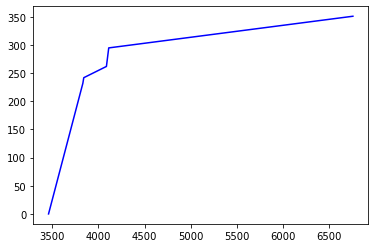

In [431]:
plot_predicted_line(p_pred_y, q_pred_y, p_test_y, q_test_y, df_equi2, -1, '20220109 08:00')

In [325]:
np_data = df_equi2[df_equi2.index.str.match('20220109 08:00')]
# np_data['bp1_p', 'bp2_p', 'bp3_p', 'bp4_p', 'bp5_p', 'bp6_p']


p_target = ['bp1_p', 'bp2_p', 'bp3_p', 'bp4_p', 'bp5_p', 'bp6_p']
q_target = ['bp1_q', 'bp2_q', 'bp3_q', 'bp4_q', 'bp5_q', 'bp6_q']
#  
train_x = df_equi_train[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load', 'Residual_Load_Diff','avai_lignite', 'avai_natural_gas', 'avai_hydro']]
p_train_y = df_equi_train[p_target]
q_train_y = df_equi_train[q_target]
test_x = df_equi_test[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro', 'Residual_Load', 'Residual_Load_Diff','avai_lignite', 'avai_natural_gas', 'avai_hydro']]
p_test_y = df_equi_test[p_target]
q_test_y = df_equi_test[q_target]

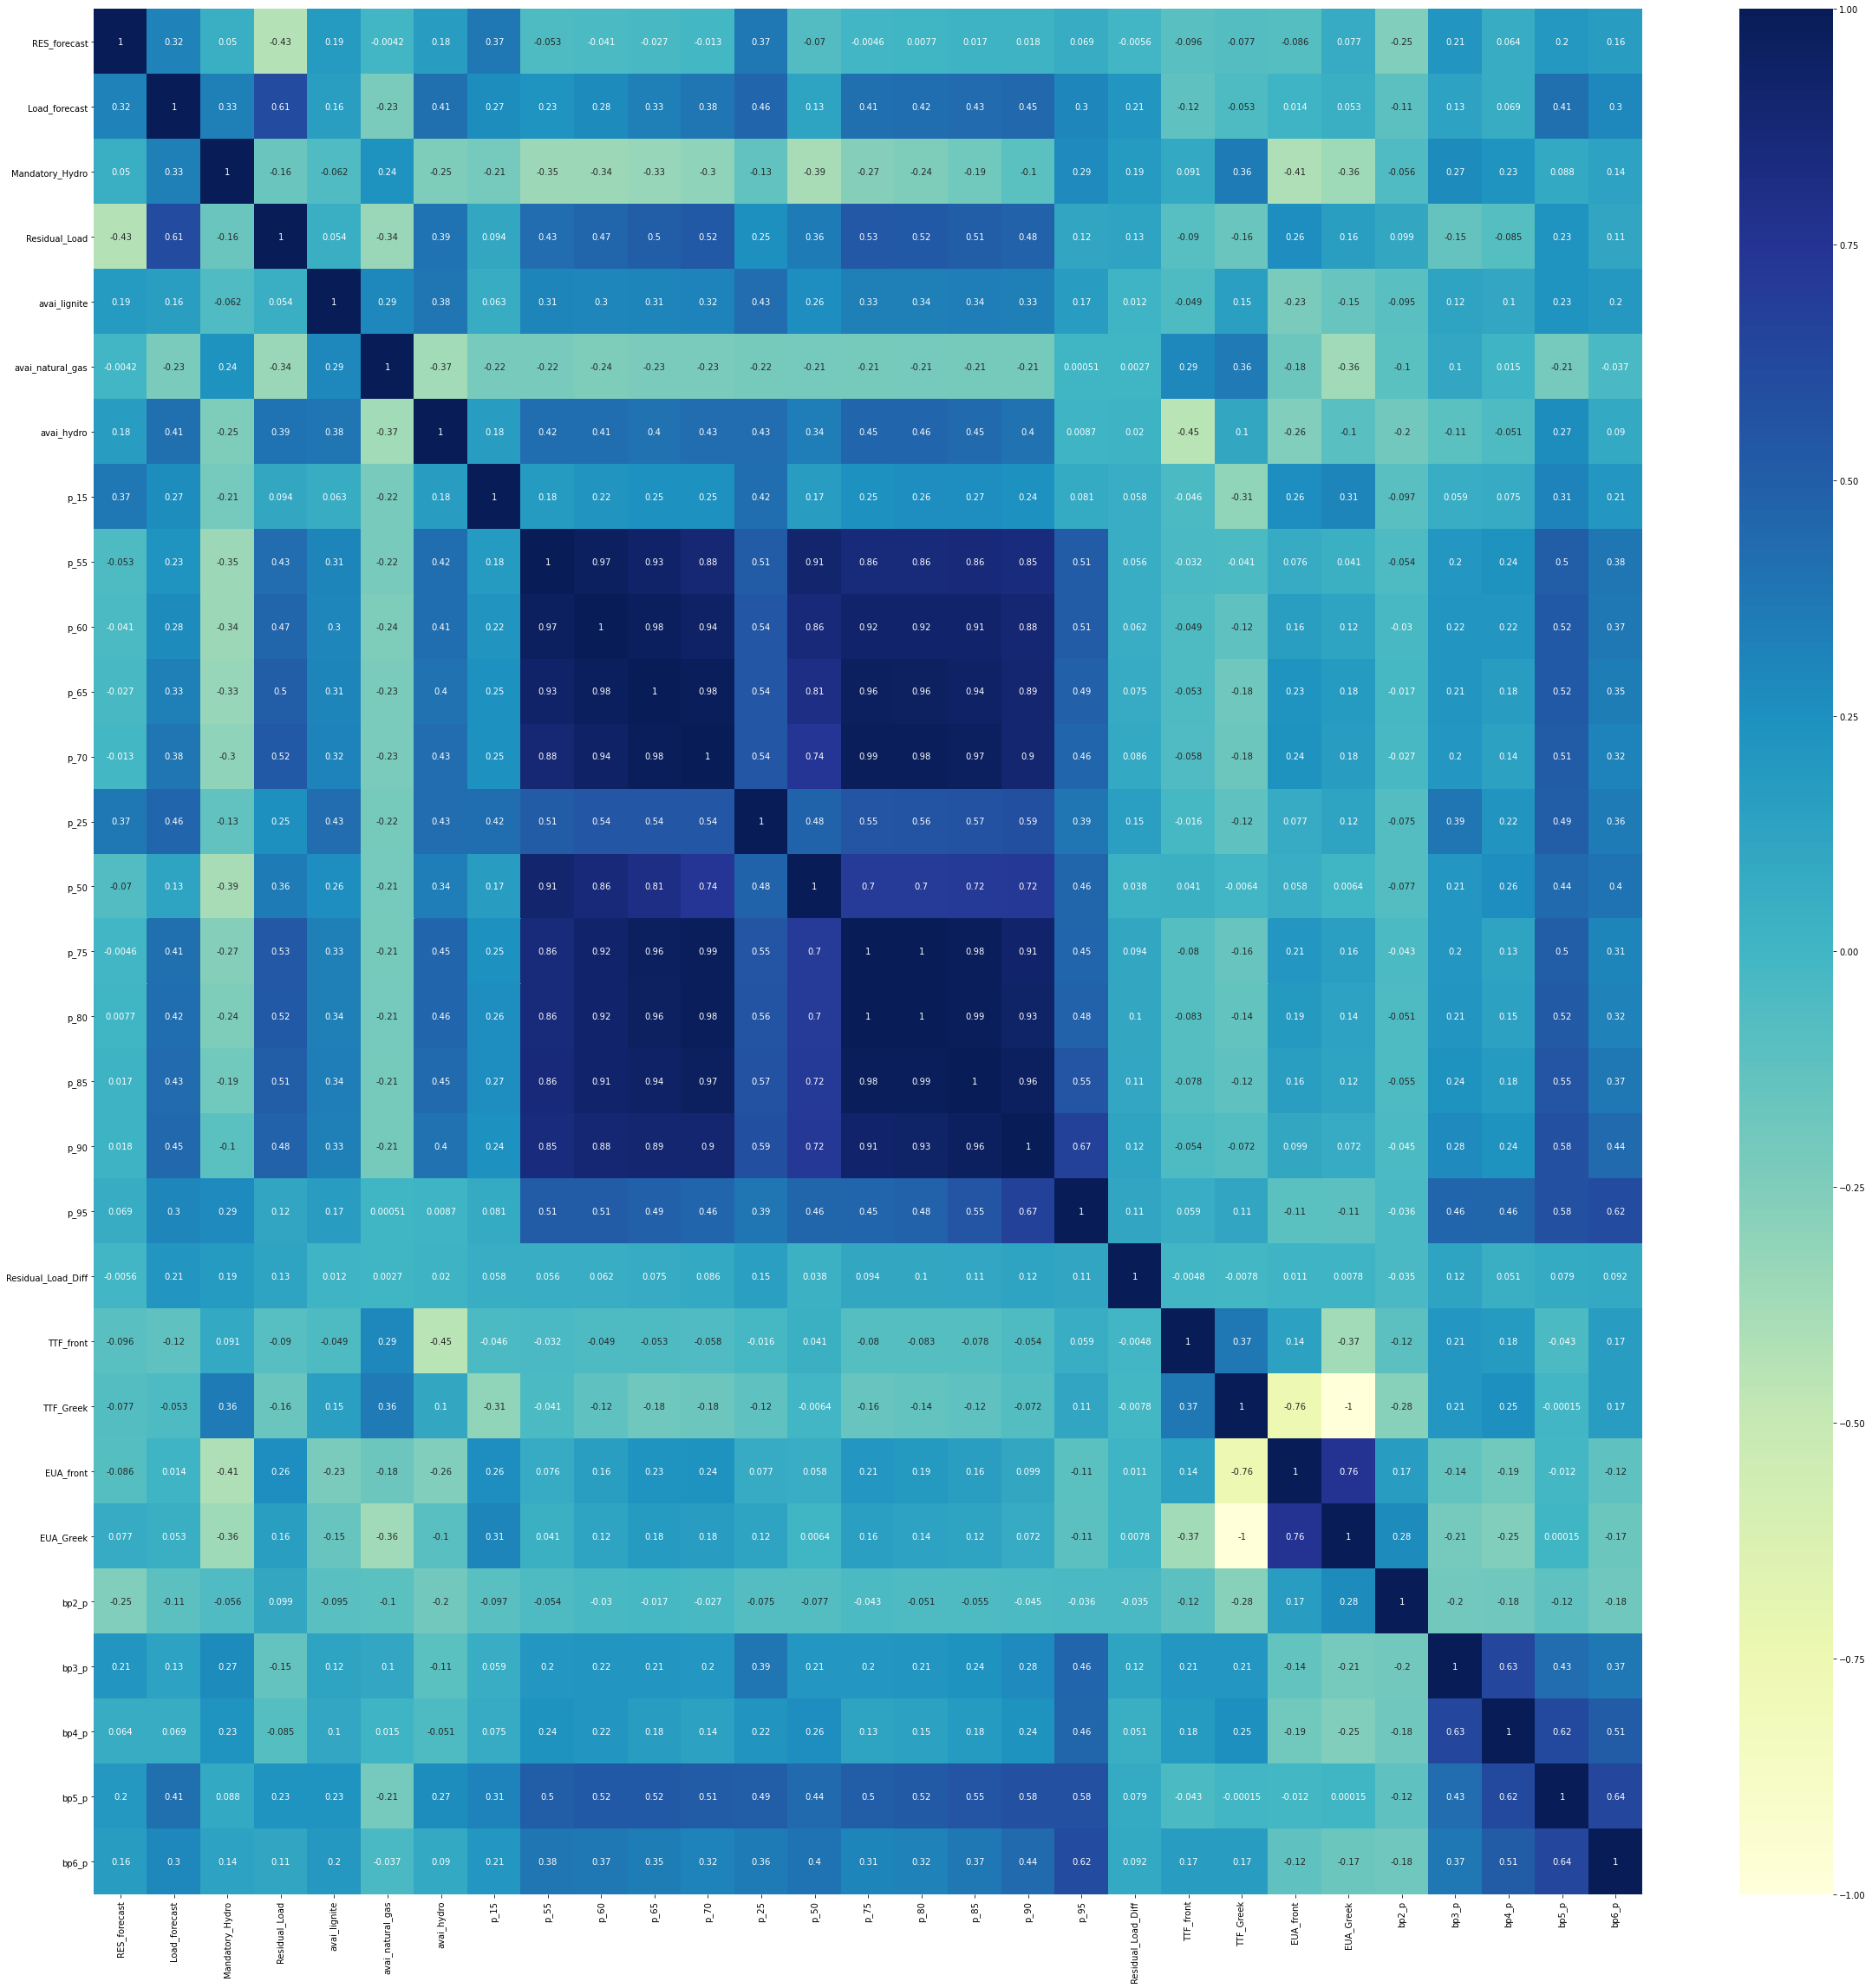

In [477]:
factors2 = short_df[['RES_forecast', 'Load_forecast', 'Mandatory_Hydro','Residual_Load', 'avai_lignite', 'avai_natural_gas', 'avai_hydro',
        'p_15', 'p_55', 'p_60', 'p_65','p_70', 'p_25', 'p_50', 'p_75', 'p_80', 'p_85', 'p_90', 'p_95', 'Residual_Load_Diff',
                   'TTF_front', 'TTF_Greek', 'EUA_front', 'EUA_Greek', 'bp2_p', 'bp3_p', 'bp4_p', 'bp5_p', 'bp6_p']]
corr = factors2.corr()
                     
#                     'q_15', 'q_55', 'q_60', 'q_65', 'q_70', 'q_25', 'q_50','q_75', 'q_80', 'q_85','q_90', 'q_95', 'q_100',
                     
plt.figure(figsize = (40,40))
sb.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()